<a href="https://colab.research.google.com/github/Vyagh/MiniProject/blob/main/MusicGenreClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Python libraries for data analysis and machine learning.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

#additional libraries for working with audio data and display.
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
general_path_colab = '/content/drive/MyDrive/Input Data: Work w  Audio Data/Data.zip (Unzipped Files)/genres_original'
#!ls command to list files in the directory
!ls "{general_path_colab}"

blues  classical  country  disco  hiphop  jazz	metal  pop  reggae  rock


**Hi, now we're going to explore audio data.**

In [ ]:
y, sr = librosa.load('/content/drive/MyDrive/Input Data: Work w  Audio Data/Data.zip (Unzipped Files)/genres_original/reggae/reggae.00036.wav')
print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')
print('Checking Length of Audio:', 661794/22050)

y: [0.02072144 0.04492188 0.05422974 ... 0.06912231 0.08303833 0.08572388] 

y shape: (661794,) 

Sample Rate (KHz): 22050 

Checking Length of Audio: 30.013333333333332


In [ ]:
#Getting rid of the dead air at the start and end of an audio file.
audio_file, _ = librosa.effects.trim(y)

#Result:
print('Audio File:', audio_file, '\n')
print('Audio File shape:', np.shape(audio_file))

Audio File: [0.02072144 0.04492188 0.05422974 ... 0.06912231 0.08303833 0.08572388] 

Audio File shape: (661794,)


**Sound waves in 2D representation.**

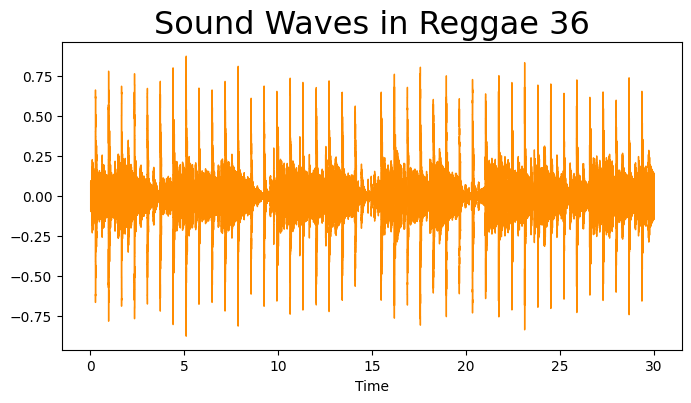

In [ ]:
plt.figure(figsize=(8, 4))
librosa.display.waveshow(y=audio_file, sr=sr, color="#FF8C00")
plt.title("Sound Waves in Reggae 36", fontsize=23)
plt.show()

**The Fourier Transform**: it is a mathematical technique that transforms a function of time (or space) into a function of frequency.

In [ ]:
# Default - FFT window size.
n_fft = 2048 # FFT window size.
hop_length = 512 # number audio of frames between STFT columns.

# Short-time Fourier transform (STFT).
D = np.abs(librosa.stft(audio_file, n_fft = n_fft, hop_length = hop_length))

print('Shape of D object:', np.shape(D))

Shape of D object: (1025, 1293)


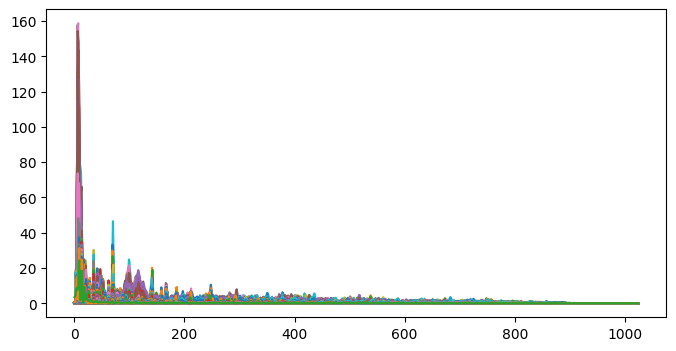

In [ ]:
plt.figure(figsize = (8, 4))
plt.plot(D);

**Spectrogram** : it is a visual representation of the spectrum of frequencies of a signal as they vary with time.
 It is a way to analyze the frequency content of a signal over time.

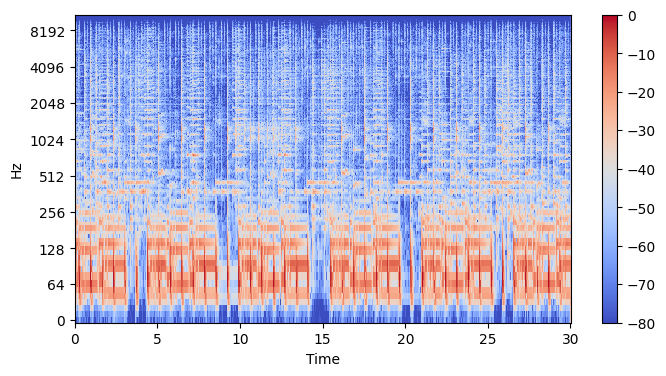

In [ ]:
# Converting an amplitude spectrogram to Decibels-scaled spectrogram.
DB = librosa.amplitude_to_db(D, ref = np.max)

# Now, creating the Spectogram.
plt.figure(figsize = (8, 4))
librosa.display.specshow(DB, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log',cmap = 'coolwarm')
plt.colorbar();

**The Mel spectrogram** : it is a type of spectrogram where the frequency axis is converted to the Mel scale, which is a perceptual scale of pitches that approximates the human ear's response to different frequencies.

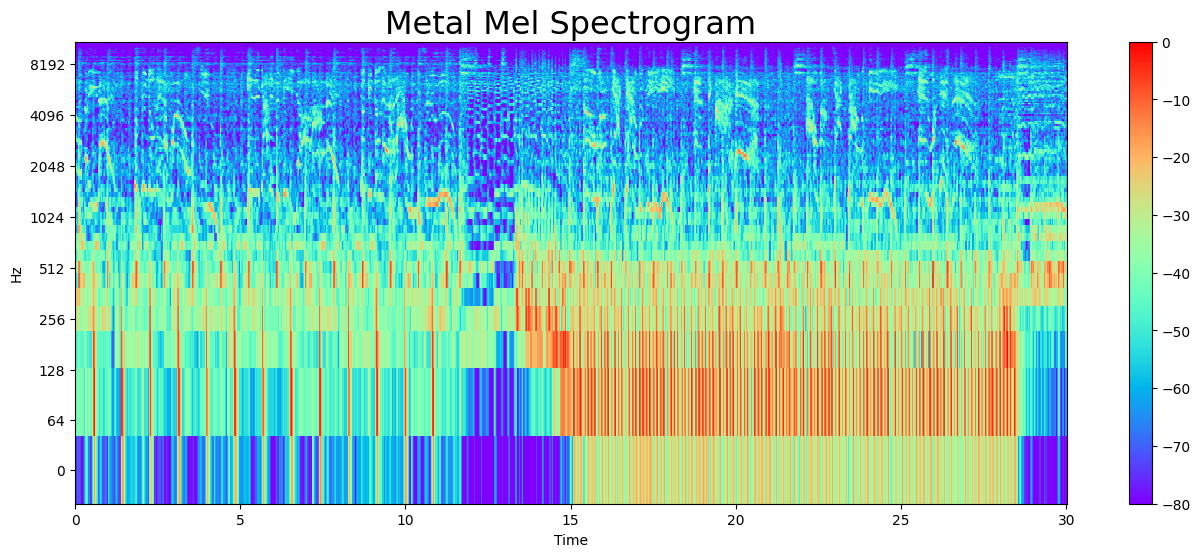

In [ ]:
y, sr = librosa.load('/content/drive/MyDrive/Input Data: Work w  Audio Data/Data.zip (Unzipped Files)/genres_original/metal/metal.00036.wav')
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'rainbow');
plt.colorbar();
plt.title("Metal Mel Spectrogram", fontsize = 23);

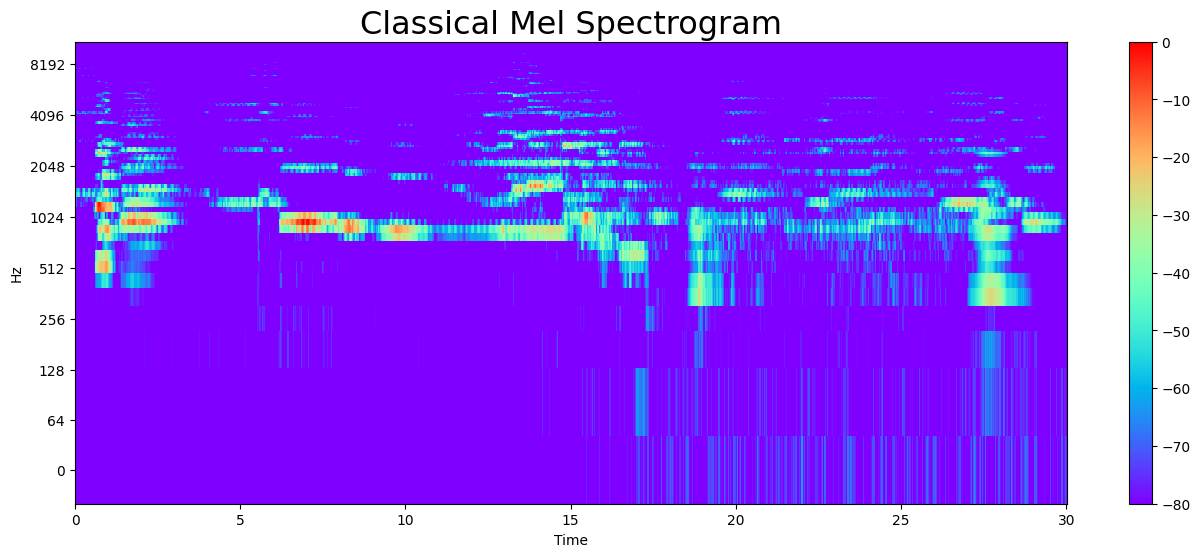

In [ ]:
y, sr = librosa.load('/content/drive/MyDrive/Input Data: Work w  Audio Data/Data.zip (Unzipped Files)/genres_original/classical/classical.00036.wav')
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'rainbow');
plt.colorbar();
plt.title("Classical Mel Spectrogram", fontsize = 23);

**Audio Features.**

In [ ]:
# Zero Crossing Rate.
zero_crossings = librosa.zero_crossings(audio_file, pad=False)
print(sum(zero_crossings))

39232


**Harmonics and Perceptrual.**

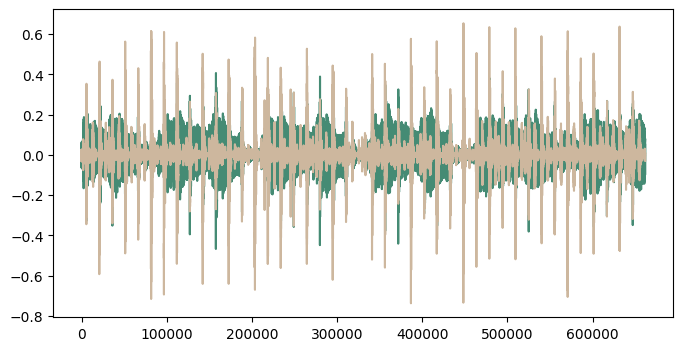

In [ ]:
y_harm, y_perc = librosa.effects.hpss(audio_file)

plt.figure(figsize = (8, 4))
plt.plot(y_harm, color = '#458B74');
plt.plot(y_perc, color = '#CDB79E');

**Tempo BMP (beats per minute)**

In [ ]:
tempo, _ = librosa.beat.beat_track(y=y, sr = sr)
tempo

107.666015625

**Spectral Centroid**: The spectral centroid is a measure used in signal processing and music analysis to characterize the "center of mass" of a sound spectrum. It provides information about the perceived "brightness" or "tonal color" of a sound.

In [ ]:
#Calculating the Spectral Centroids
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]

print('Centroids:', spectral_centroids, '\n')
print('Shape of Spectral Centroids:', spectral_centroids.shape, '\n')

#Computing the time variable for visualization
frames = range(len(spectral_centroids))

#Converting frame counts to time (seconds)
t = librosa.frames_to_time(frames)

print('frames:', frames, '\n')
print('t:', t)

#Function to normalizes the Sound Data
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

Centroids: [3172.94397563 3298.45062121 3097.25080728 ... 1785.72493233 1768.59754162
 1939.15222816] 

Shape of Spectral Centroids: (1293,) 

frames: range(0, 1293) 

t: [0.00000000e+00 2.32199546e-02 4.64399093e-02 ... 2.99537415e+01
 2.99769615e+01 3.00001814e+01]


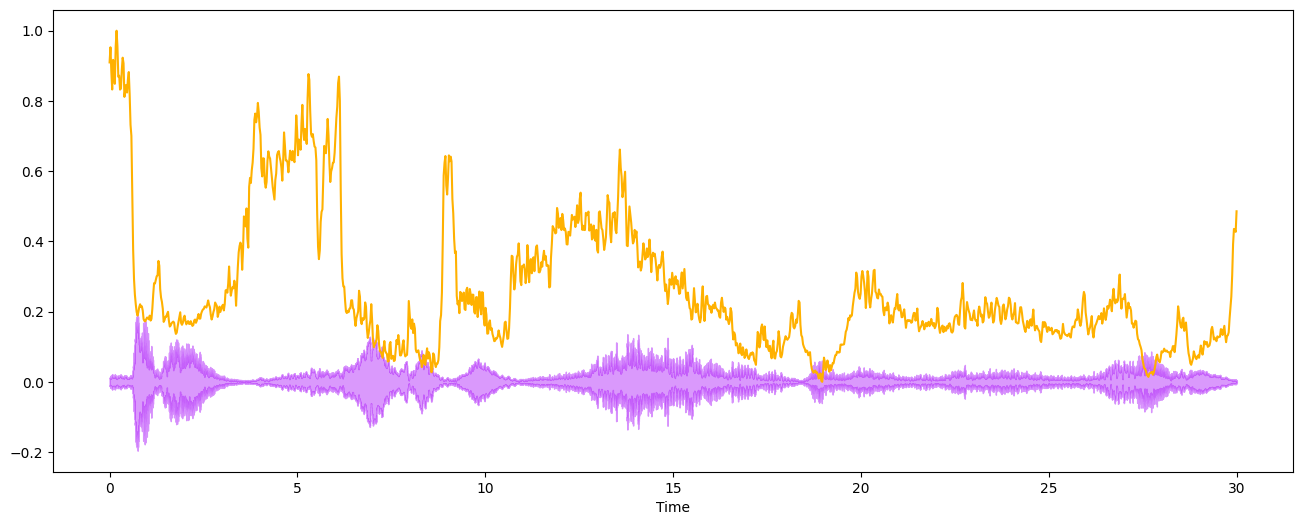

In [ ]:
# Plotting the Spectral Centroid along the waveform
plt.figure(figsize=(16, 6))
librosa.display.waveshow(y=y, sr=sr, alpha=0.4, color='#A300F9')
plt.plot(t, normalize(spectral_centroids), color='#FFB100')
plt.show()

**Spectral Rolloff**:

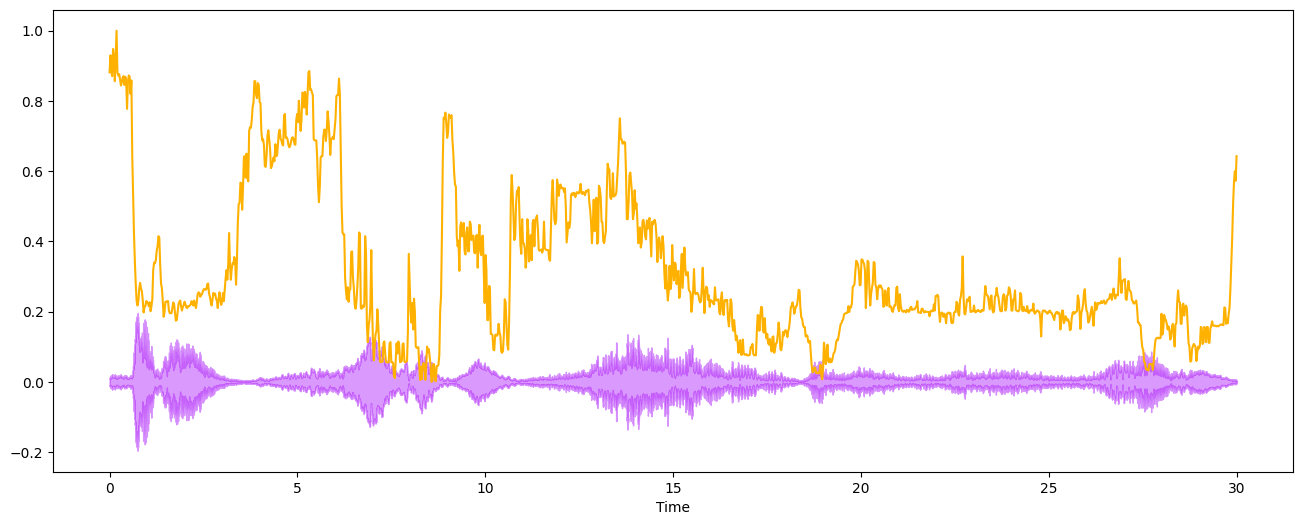

In [ ]:
#Spectral RollOff Vector.
spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)[0]

#The plot.
plt.figure(figsize = (16, 6))
librosa.display.waveshow(y=y, sr=sr, alpha=0.4, color = '#A300F9');
plt.plot(t, normalize(spectral_rolloff), color='#FFB100');
plt.show()

**Mel-Frequency Cepstral Coefficients:**

mfccs shape: (20, 1293)


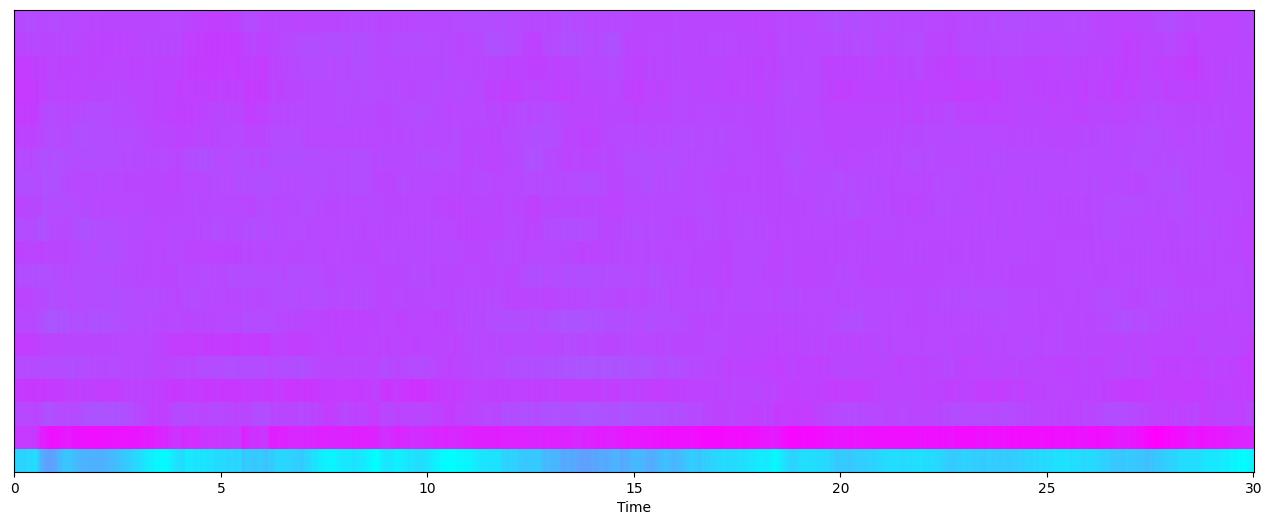

In [ ]:
mfccs = librosa.feature.mfcc(y=y, sr=sr)
print('mfccs shape:', mfccs.shape)

#Displaying  the MFCCs:
plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');

Mean: 7.3756716e-09 

Var: 0.99999994


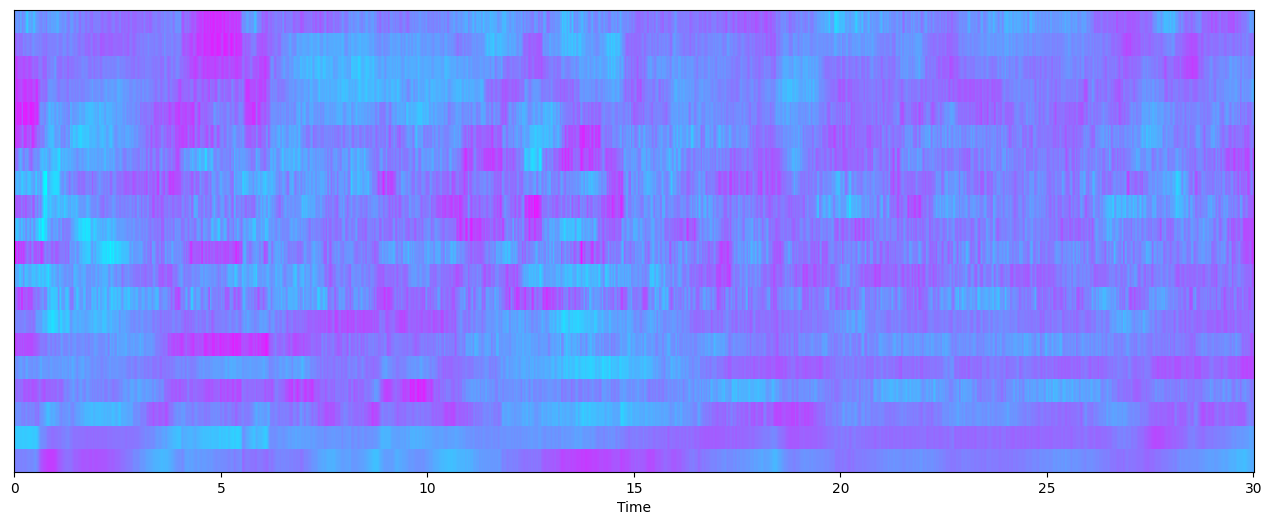

In [ ]:
#Performing Feature Scaling
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print('Mean:', mfccs.mean(), '\n')
print('Var:', mfccs.var())

plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');

**Chroma Frequencies:**

Chromogram shape: (12, 133)


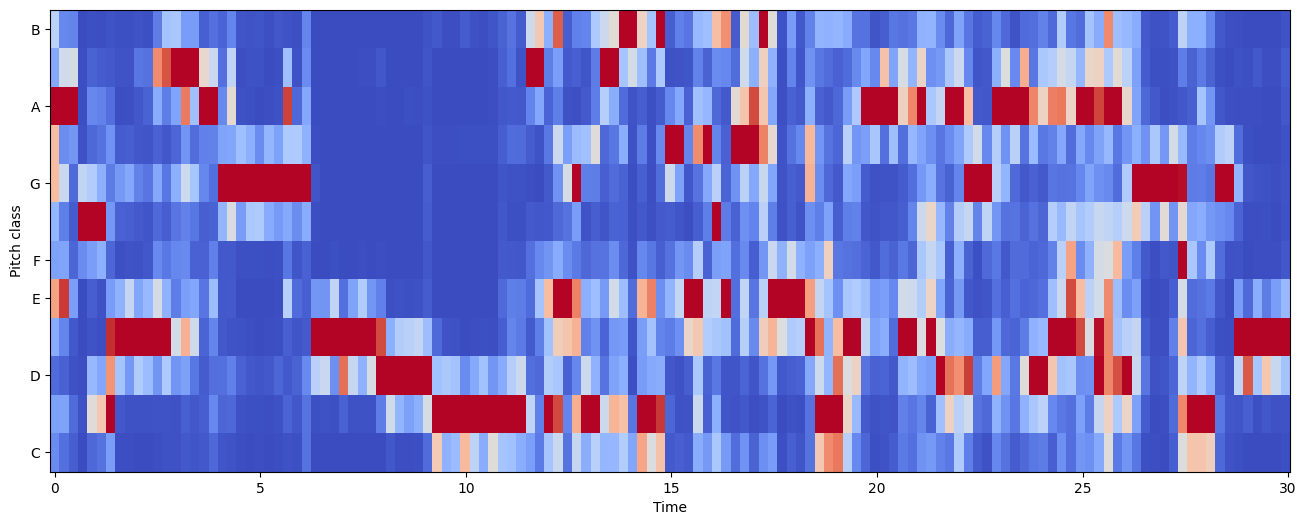

In [ ]:
# Increase or decrease hop_length to change how granular you want your data to be
hop_length = 5000

# Chromogram
chromagram = librosa.feature.chroma_stft(y=y, sr=sr, hop_length=hop_length)
print('Chromogram shape:', chromagram.shape)

plt.figure(figsize=(16, 6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm');

**EDA**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Input Data: Work w  Audio Data/Data.zip (Unzipped Files)/features_30_sec.csv')
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


**Creating Correlation Heatmap for feature means**:

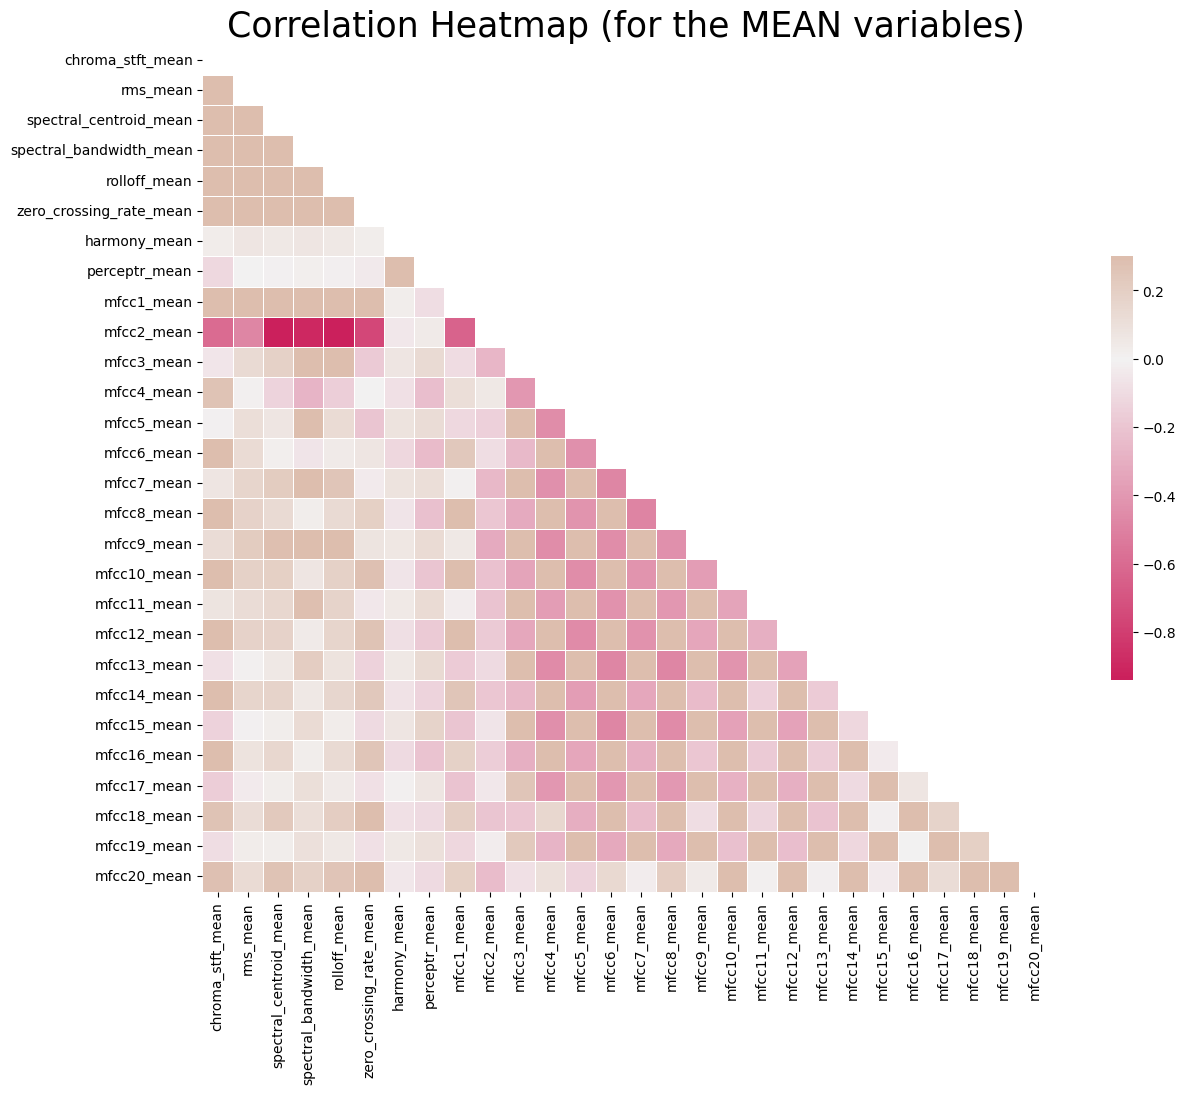

In [ ]:
#Computing the Correlation Matrix-
spike_cols = [col for col in data.columns if 'mean' in col]
corr = data[spike_cols].corr()

#Generating a mask for the upper triangle-
mask = np.triu(np.ones_like(corr, dtype=np.bool))

#Setting up the matplotlib figure-
f, ax = plt.subplots(figsize=(16, 11));

#Generating a custom diverging colormap-
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

#Drawing the heatmap with the mask and correct aspect ratio-
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 25)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.savefig("Corr Heatmap.jpg")

**Box Plot for Genres Distributions**

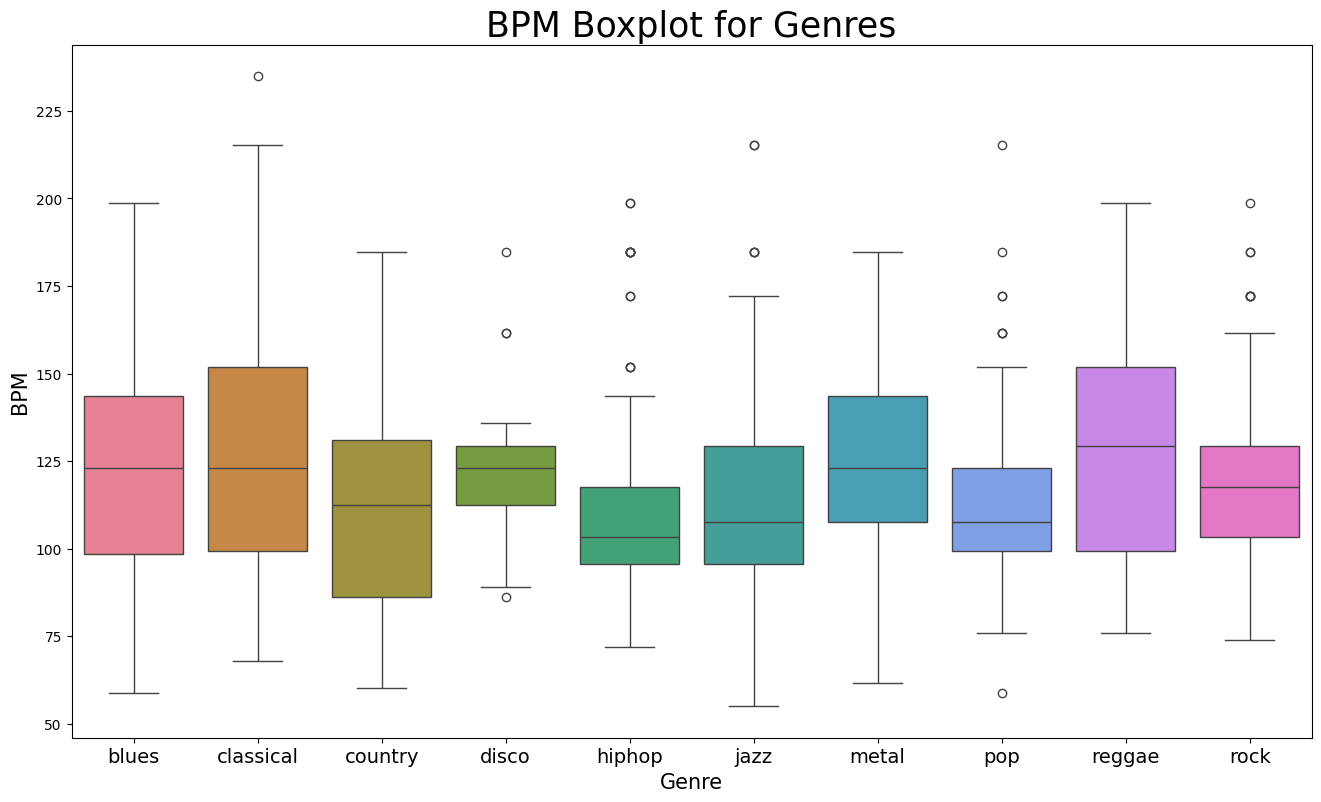

In [ ]:
x = data[["label", "tempo"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM Boxplot.jpg")

**Principal Component Analysis - to visualize possible groups of genres:**

In [ ]:
from sklearn import preprocessing

data = data.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

#Normalize:
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, y], axis = 1)

pca.explained_variance_ratio_


array([0.2439355 , 0.21781804])

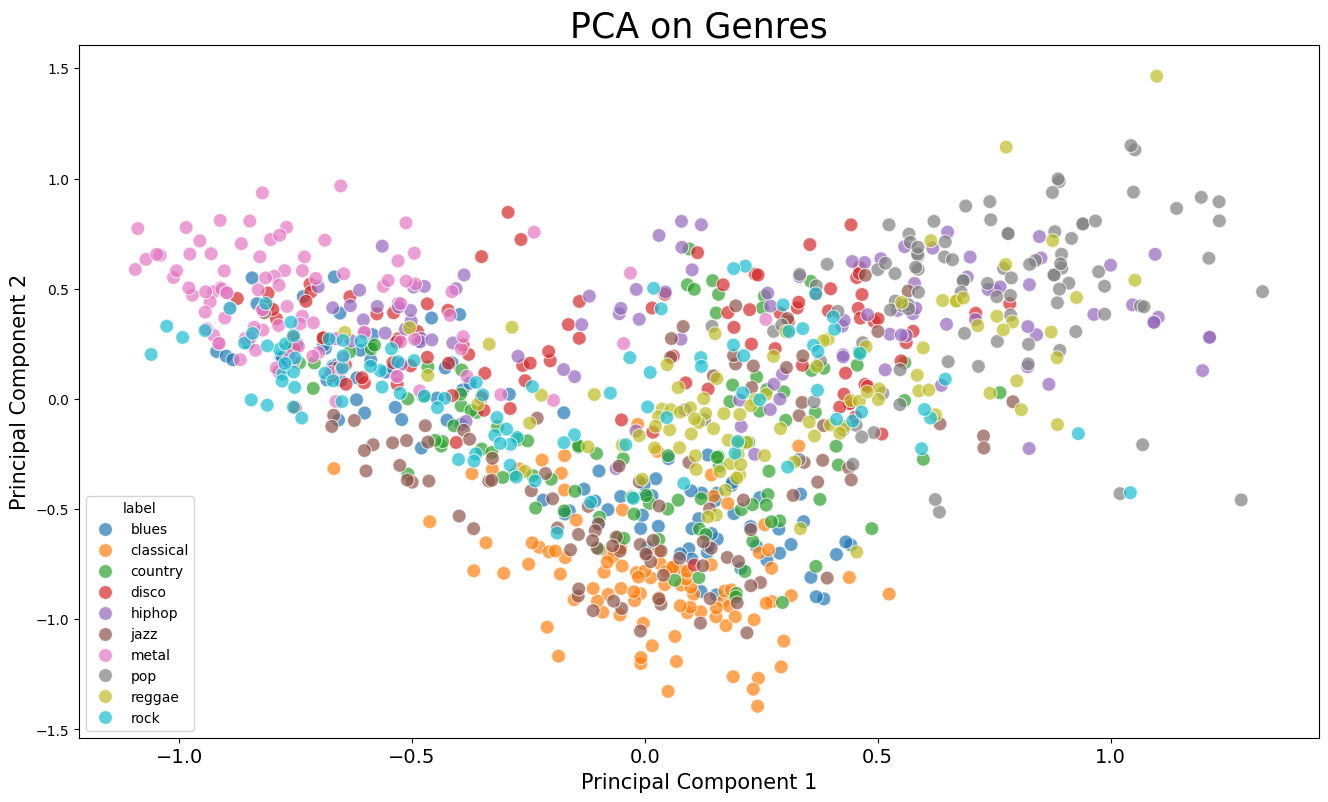

In [ ]:

plt.figure(figsize = (16, 9))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, hue = "label", alpha = 0.7,
               s = 100);

plt.title('PCA on Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA Scattert.jpg")

**MACHINE LEARNING CLASSIFICATION!!!**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Input Data: Work w  Audio Data/Data.zip (Unzipped Files)/features_3_sec.csv')
data = data.iloc[0:, 1:]
data.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


**Features and Target variable.**

In [ ]:
y = data['label']
X = data.loc[:, data.columns != 'label']

#Normalize x
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

#New data frame with the new scaled data.
X = pd.DataFrame(np_scaled, columns = cols)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Predefined function to assess the accuracy of a model:**

In [ ]:
def model_assess(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')

In [ ]:
from sklearn.preprocessing import LabelEncoder

#Converting string labels to numerical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
nb = GaussianNB()
model_assess(nb, "Naive Bayes")

sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
model_assess(tree, "Decission trees")

rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")

svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_assess(lg, "Logistic Regression")

nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
model_assess(nn, "Neural Nets")

Accuracy Naive Bayes : 0.51952 

Accuracy Stochastic Gradient Descent : 0.65532 

Accuracy KNN : 0.80581 

Accuracy Decission trees : 0.64565 

Accuracy Random Forest : 0.81415 

Accuracy Support Vector Machine : 0.75409 

Accuracy Logistic Regression : 0.6977 

Accuracy Neural Nets : 0.67835 



**Final Model.**

Accuracy: 0.9009 



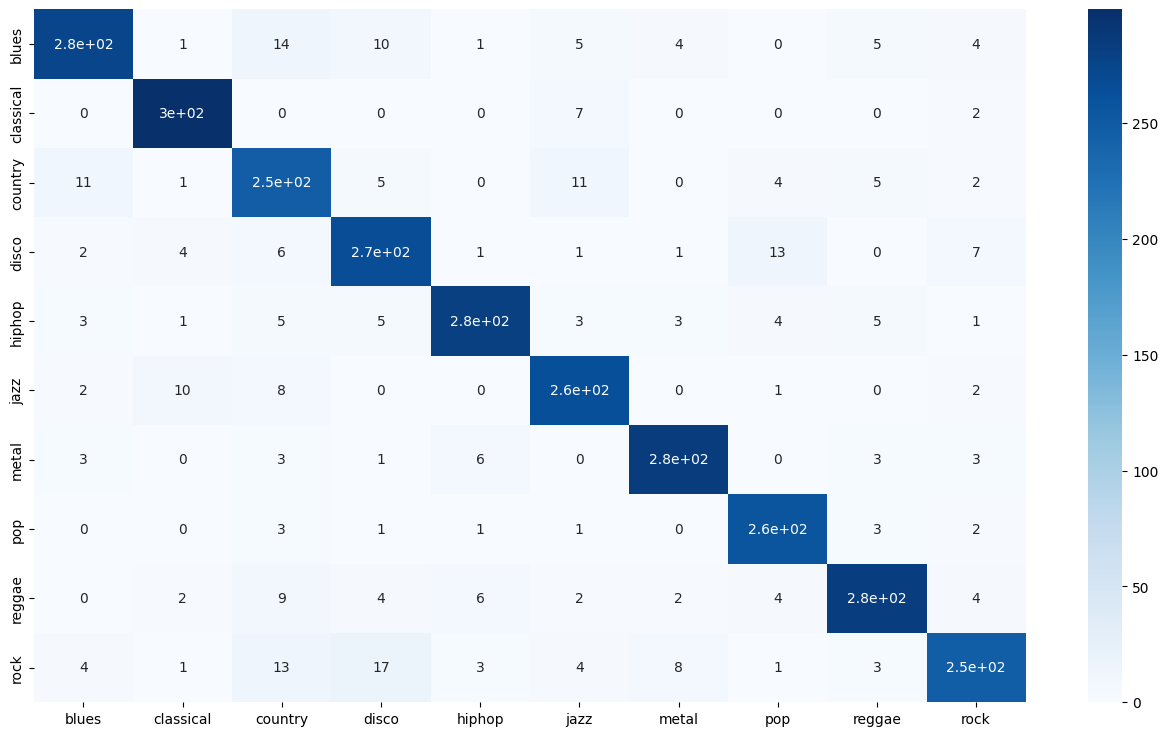

In [ ]:
# Train the XGBoost classifier
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
xgb.fit(X_train, y_train_encoded)

# Make predictions on the test set
preds_encoded = xgb.predict(X_test)

# Convert numerical predictions back to string labels
preds = label_encoder.inverse_transform(preds_encoded)

# Print accuracy
print('Accuracy:', round(accuracy_score(y_test, preds), 5), '\n')

# Confusion Matrix
confusion_matr = confusion_matrix(y_test, preds)
plt.figure(figsize=(16, 9))
sns.heatmap(confusion_matr, cmap="Blues", annot=True,
            xticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
            yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"])
plt.savefig("conf matrix")

**Feature Importance.**

In [ ]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=4130485e81707ad02f861aa16e314572c638ff31efd6f8a3916764ce4506805e
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(estimator=xgb, random_state=1)
perm.fit(X_test, y_test)

eli5.show_weights(estimator=perm, feature_names = X_test.columns.tolist())

**RECOMMENDER SYSTEM.**

In [ ]:
import IPython.display as ipd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import preprocessing

data = pd.read_csv('/content/drive/MyDrive/Input Data: Work w  Audio Data/Data.zip (Unzipped Files)/features_30_sec.csv', index_col='filename')

labels = data[['label']]

data = data.drop(columns=['length','label'])
data.head()

data_scaled=preprocessing.scale(data)
print('Scaled data type:', type(data_scaled))

In [ ]:
#Cosine similarity-
similarity = cosine_similarity(data_scaled)
print("Similarity shape:", similarity.shape)

sim_df_labels = pd.DataFrame(similarity)
sim_df_names = sim_df_labels.set_index(labels.index)
sim_df_names.columns = labels.index

sim_df_names.head()

**Song similarity scoring:**

In [ ]:
def find_similar_songs(name):
    #To Find songs most similar to another song
    series = sim_df_names[name].sort_values(ascending = False)

    #Removing cosine similarity == 1
    series = series.drop(name)

    #Here, we'd display the 5 top matches:
    print("\n-------\nSimilar songs to ", name)
    print(series.head(5))

**Putting the Similarity Function into Action:**

In [ ]:
#Iron Maiden- Flight of Icarus
find_similar_songs('metal.00002.wav')

ipd.Audio('/content/drive/MyDrive/Input Data: Work w  Audio Data/Data.zip (Unzipped Files)/genres_original/metal/metal.00002.wav')

In [ ]:
#Similar song match no.1: Motorhead - Ace of Spades
ipd.Audio('/content/drive/MyDrive/Input Data: Work w  Audio Data/Data.zip (Unzipped Files)/genres_original/metal/metal.00028.wav')

In [ ]:
#Similar song match no.2: Queen - Tear it Up
ipd.Audio('/content/drive/MyDrive/Input Data: Work w  Audio Data/Data.zip (Unzipped Files)/genres_original/metal/metal.00059.wav')

In [ ]:
#Similar song match no.3: Queen - Another One Bites The Dust
ipd.Audio('/content/drive/MyDrive/Input Data: Work w  Audio Data/Data.zip (Unzipped Files)/genres_original/metal/metal.00018.wav')

In [ ]:
#Similar song match no.4: Queen - Under Pressure
ipd.Audio('/content/drive/MyDrive/Input Data: Work w  Audio Data/Data.zip (Unzipped Files)/genres_original/metal/metal.00017.wav')

In [ ]:
#Similar song match no.5: Queen - Tie Your Mother Down
ipd.Audio('/content/drive/MyDrive/Input Data: Work w  Audio Data/Data.zip (Unzipped Files)/genres_original/metal/metal.00016.wav')

Thank-you, signing off!